In [1]:
import pandas as pd

# Загрузка данных
file_path = 'data.csv'
data = pd.read_csv(file_path, header=None)

# Просмотр первых строк
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


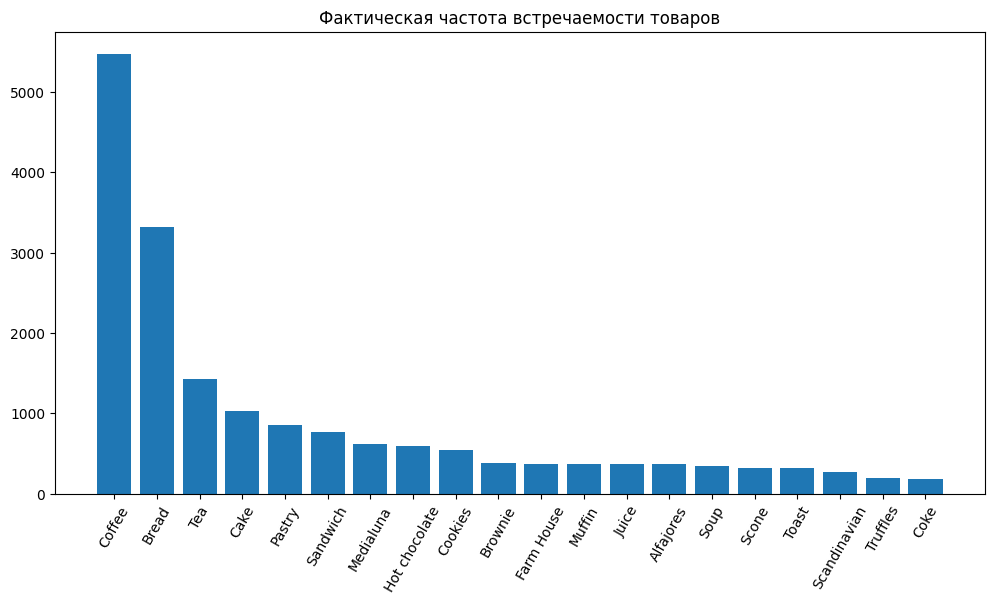

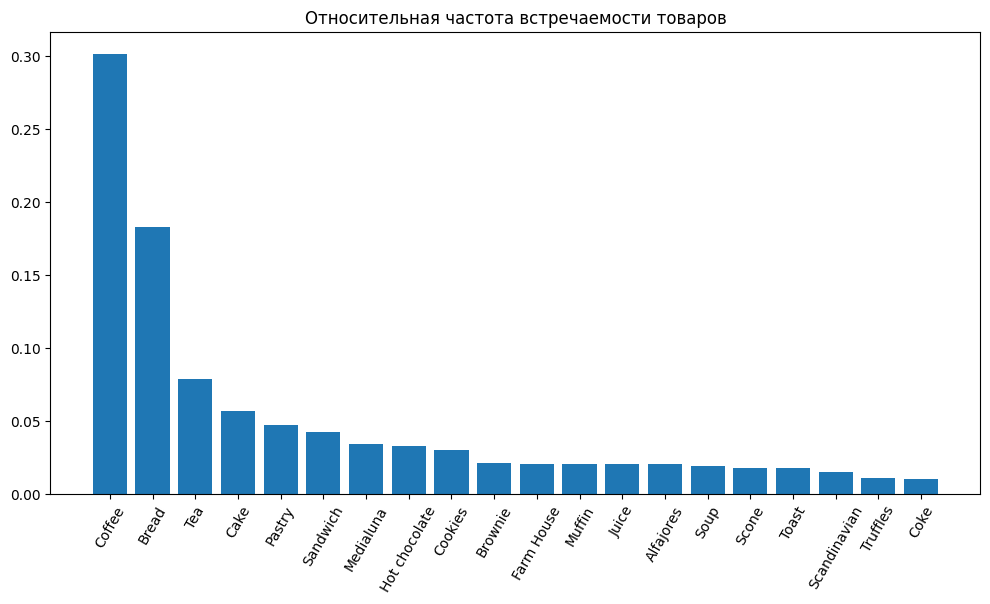

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

# Подсчет всех товаров
items = Counter()
for transaction in data.values:
    items.update([item for item in transaction if pd.notna(item)])

# Отбор 20 наиболее популярных товаров
top_20_items = items.most_common(20)
items_names, items_counts = zip(*top_20_items)

# Построение гистограммы фактической частоты
plt.figure(figsize=(12, 6))
plt.bar(items_names, items_counts)
plt.xticks(rotation=60)
plt.title('Фактическая частота встречаемости товаров')
plt.show()

# Относительная частота
total_items = sum(items_counts)
relative_frequency = [count / total_items for count in items_counts]

# Построение гистограммы относительной частоты
plt.figure(figsize=(12, 6))
plt.bar(items_names, relative_frequency)
plt.xticks(rotation=60)
plt.title('Относительная частота встречаемости товаров')
plt.show()


In [3]:
# Импорт необходимых модулей
from apriori_python import apriori

# Преобразование данных в список списков для алгоритма Apriori
transactions = []
for transaction in data.values:
    transactions.append([item for item in transaction if pd.notna(item)])

# Применение алгоритма Apriori
itemsets, rules = apriori(transactions, minSup=0.02, minConf=0.2)

# Отбор 10 наилучших правил
sorted_rules = sorted(rules, key=lambda x: x[2], reverse=True)[:10]

# Вывод правил
for rule in sorted_rules:
    print(f"Rule: {rule[0]} -> {rule[1]}, Confidence: {rule[2]}")

Rule: {'Toast'} -> {'Coffee'}, Confidence: 0.7044025157232704
Rule: {'Medialuna'} -> {'Coffee'}, Confidence: 0.5692307692307692
Rule: {'Pastry'} -> {'Coffee'}, Confidence: 0.5521472392638037
Rule: {'Juice'} -> {'Coffee'}, Confidence: 0.5342465753424658
Rule: {'Sandwich'} -> {'Coffee'}, Confidence: 0.5323529411764706
Rule: {'Cake'} -> {'Coffee'}, Confidence: 0.5269582909460834
Rule: {'Cookies'} -> {'Coffee'}, Confidence: 0.5184466019417475
Rule: {'Hot chocolate'} -> {'Coffee'}, Confidence: 0.5072463768115942
Rule: {'Tea'} -> {'Coffee'}, Confidence: 0.3496296296296296
Rule: {'Pastry'} -> {'Bread'}, Confidence: 0.33865030674846625


In [4]:
# Импорт библиотеки
from apyori import apriori as apyori_apriori

# Применение алгоритма Apriori с гиперпараметрами
apyori_rules = list(apyori_apriori(transactions, min_support=0.02, min_confidence=0.2))

# Отбор 10 наилучших правил
apyori_rules = apyori_rules[:10]

# Вывод правил
for rule in apyori_rules:
    for ordered_stat in rule.ordered_statistics:
        print(f"Rule: {list(ordered_stat.items_base)} -> {list(ordered_stat.items_add)}, Confidence: {ordered_stat.confidence}")


Rule: [] -> ['Bread'], Confidence: 0.3249396705487357
Rule: [] -> ['Coffee'], Confidence: 0.4750813136082258
Rule: ['Cake'] -> ['Bread'], Confidence: 0.22482197355035605
Rule: ['Bread'] -> ['Coffee'], Confidence: 0.2751049402647724
Rule: ['Pastry'] -> ['Bread'], Confidence: 0.3386503067484663
Rule: ['Cake'] -> ['Coffee'], Confidence: 0.5269582909460834
Rule: ['Cake'] -> ['Tea'], Confidence: 0.2288911495422177
Rule: ['Cookies'] -> ['Coffee'], Confidence: 0.5184466019417476
Rule: ['Hot chocolate'] -> ['Coffee'], Confidence: 0.5072463768115942
Rule: ['Juice'] -> ['Coffee'], Confidence: 0.5342465753424658


In [5]:
# Импорт библиотеки
from efficient_apriori import apriori as efficient_apriori

# Применение алгоритма Apriori
itemsets, efficient_rules = efficient_apriori(transactions, min_support=0.02, min_confidence=0.2)

# Отбор 10 наилучших правил
efficient_rules = sorted(efficient_rules, key=lambda rule: rule.confidence, reverse=True)[:10]

# Вывод правил
for rule in efficient_rules:
    print(f"Rule: {rule.lhs} -> {rule.rhs}, Confidence: {rule.confidence}")

Rule: ('Toast',) -> ('Coffee',), Confidence: 0.7044025157232704
Rule: ('Medialuna',) -> ('Coffee',), Confidence: 0.5692307692307692
Rule: ('Pastry',) -> ('Coffee',), Confidence: 0.5521472392638037
Rule: ('Juice',) -> ('Coffee',), Confidence: 0.5342465753424658
Rule: ('Sandwich',) -> ('Coffee',), Confidence: 0.5323529411764706
Rule: ('Cake',) -> ('Coffee',), Confidence: 0.5269582909460834
Rule: ('Cookies',) -> ('Coffee',), Confidence: 0.5184466019417475
Rule: ('Hot chocolate',) -> ('Coffee',), Confidence: 0.5072463768115942
Rule: ('Tea',) -> ('Coffee',), Confidence: 0.3496296296296296
Rule: ('Pastry',) -> ('Bread',), Confidence: 0.33865030674846625


In [6]:
import pandas as pd
from fpgrowth_py import fpgrowth
from itertools import combinations

# Загрузка данных
file_path = 'data.csv'
data = pd.read_csv(file_path, header=None)

# Преобразование данных в список списков для алгоритмов
transactions = []
for transaction in data.values:
    transactions.append([item for item in transaction if pd.notna(item)])

# Применение алгоритма FP-Growth
min_support = 0.02
min_conf = 0.2  # Минимальная доверительная вероятность

fpgrowth_itemsets, fpgrowth_rules = fpgrowth(transactions, min_support, min_conf)

# Отбор 10 наилучших правил
fpgrowth_rules = sorted(fpgrowth_rules, key=lambda rule: rule[2], reverse=True)[:10]

# Вывод правил
for rule in fpgrowth_rules:
    print(f"Rule: {rule[0]} -> {rule[1]}, Confidence: {rule[2]}")


Rule: {'Toast'} -> {'Coffee'}, Confidence: 0.7044025157232704
Rule: {'Medialuna'} -> {'Coffee'}, Confidence: 0.5692307692307692
Rule: {'Pastry'} -> {'Coffee'}, Confidence: 0.5521472392638037
Rule: {'Alfajores'} -> {'Coffee'}, Confidence: 0.5406976744186046
Rule: {'Juice'} -> {'Coffee'}, Confidence: 0.5342465753424658
Rule: {'Sandwich'} -> {'Coffee'}, Confidence: 0.5323529411764706
Rule: {'Cake'} -> {'Coffee'}, Confidence: 0.5269582909460834
Rule: {'Cake'} -> {'Coffee'}, Confidence: 0.5269582909460834
Rule: {'Scone'} -> {'Coffee'}, Confidence: 0.5229357798165137
Rule: {'Cookies'} -> {'Coffee'}, Confidence: 0.5184466019417475


Apriori (apriori_python) - Время выполнения: 0.3858 секунд
Apriori (apyori) - Время выполнения: 0.0063 секунд
Apriori (efficient_apriori) - Время выполнения: 0.0049 секунд
FP-Growth - Время выполнения: 0.1788 секунд


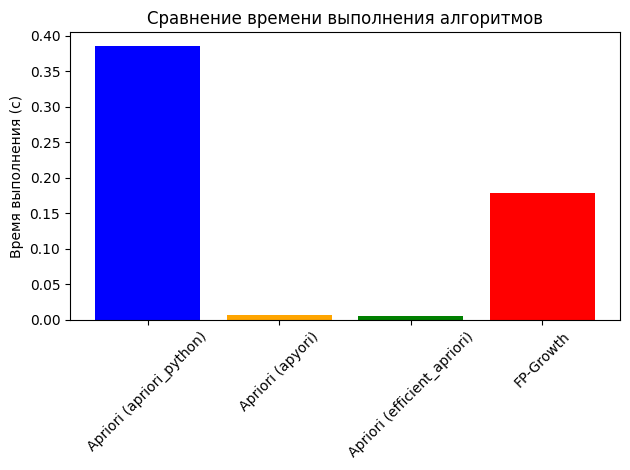

In [7]:
import time
import pandas as pd
from fpgrowth_py import fpgrowth
from efficient_apriori import apriori as efficient_apriori
from apyori import apriori as apyori_apriori
from apriori_python import apriori
import matplotlib.pyplot as plt

# Загрузка данных
file_path = 'data.csv'
data = pd.read_csv(file_path, header=None)

# Преобразование данных в список списков для алгоритма Apriori
transactions = []
for transaction in data.values:
    transactions.append([item for item in transaction if pd.notna(item)])

# Сравнение времени выполнения для apriori_python
start_time = time.time()
itemsets, rules = apriori(transactions, minSup=0.02, minConf=0.2)
end_time = time.time()
time_apriori = end_time - start_time
print(f"Apriori (apriori_python) - Время выполнения: {time_apriori:.4f} секунд")

# Сравнение времени выполнения для apyori
start_time = time.time()
apyori_rules = list(apyori_apriori(transactions, min_support=0.02, min_confidence=0.2))
end_time = time.time()
time_apyori = end_time - start_time
print(f"Apriori (apyori) - Время выполнения: {time_apyori:.4f} секунд")

# Сравнение времени выполнения для efficient_apriori
start_time = time.time()
itemsets, efficient_rules = efficient_apriori(transactions, min_support=0.02, min_confidence=0.2)
end_time = time.time()
time_efficient = end_time - start_time
print(f"Apriori (efficient_apriori) - Время выполнения: {time_efficient:.4f} секунд")

# Сравнение времени выполнения для FP-Growth
start_time = time.time()
min_support = 0.02
min_conf = 0.2  # Минимальная доверительная вероятность
fpgrowth_itemsets, fpgrowth_rules = fpgrowth(transactions, min_support, min_conf)
end_time = time.time()
time_FPGrowth = end_time - start_time
print(f"FP-Growth - Время выполнения: {time_FPGrowth:.4f} секунд")

# Подготовка данных для графика
execution_times = [time_apriori, time_apyori, time_efficient, time_FPGrowth]
algorithms = ['Apriori (apriori_python)', 'Apriori (apyori)', 'Apriori (efficient_apriori)', 'FP-Growth']

# Построение графика
plt.bar(algorithms, execution_times, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Время выполнения (с)')
plt.title('Сравнение времени выполнения алгоритмов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
